# Machine Learning models for Clustering

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Load the Excel file
file_path = 'DATA/OSA_DB_class.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the dataframe
df.head()

df_clus = df.drop(columns=['OSA', 'Gender'])

from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
df_clus_scaled = scaler.fit_transform(df_clus)

# Print the mean and standard deviation of the normalized data
print("Mean of normalized data:", df_clus_scaled.mean(axis=0))
print("Standard deviation of normalized data:", df_clus_scaled.std(axis=0))

# Convert the normalized data to a dataframe
df_clus_scaled = pd.DataFrame(df_clus_scaled, columns=df_clus.columns)

df_clus_scaled.head()

Mean of normalized data: [-1.06581410e-16  2.60532336e-16  1.56911521e-15  9.59232693e-16
  4.67773968e-16]
Standard deviation of normalized data: [1. 1. 1. 1. 1.]


,Weight,Age,Height,Cervical,BMI
0,-0.389044,-0.741306,-0.365163,-0.049559,-0.229797
1,-0.094129,-0.172011,-0.014700,0.502564,-0.086664
2,0.984538,-1.310602,1.902938,0.270800,-0.033632
3,-0.185550,-0.741306,-0.262068,0.270800,-0.047892
4,2.815980,-0.090684,0.047219,0.734328,3.202889


## K-means clustering

### Use elbow method to find optimal number of clusters

c:\Users\pc\anaconda3\envs\ENV_MLLB\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\pc\anaconda3\envs\ENV_MLLB\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\pc\anaconda3\envs\ENV_MLLB\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\pc\anaconda3\envs\ENV_MLLB\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMe

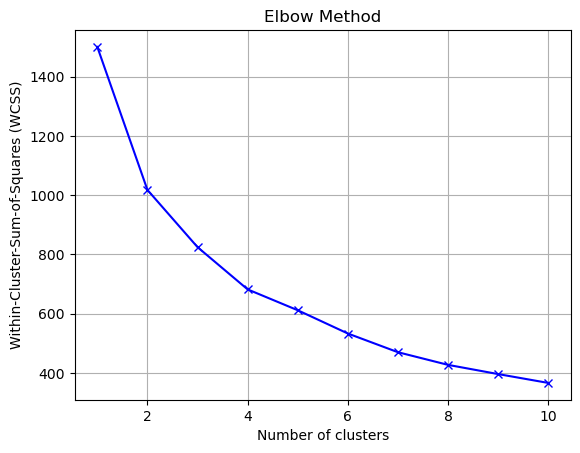

In [31]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init= 'auto', random_state=42)
    kmeans.fit(df_clus_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, 'bx-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')
plt.grid('on')
plt.show()

In [18]:
# Perform K-means clustering with 5 clusters
kmeans_5 = KMeans(n_clusters=5, init='k-means++', n_init='auto', random_state=42)
kmeans_5.fit(df_clus_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = kmeans_5.labels_

# Display the first few rows of the dataframe with cluster labels
df.head()

c:\Users\pc\anaconda3\envs\ENV_MLLB\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Gender,Weight,Age,Height,Cervical,BMI,OSA,Cluster
0,1,82.000000,39.0,168.000000,40.617735,29.053288,Severe,3
1,1,87.797037,46.0,171.399408,43.000000,29.885548,Severe,3
2,1,109.000000,32.0,190.000000,42.000000,30.193906,Healthy,0
3,1,86.000000,39.0,169.000000,42.000000,30.110991,Severe,3
4,1,145.000000,47.0,172.000000,44.000000,49.012980,Severe,4


In [20]:
# Print the cluster centers
print("Cluster Centers:")
print(kmeans_5.cluster_centers_)

Cluster Centers:
[[ 0.79899944 -0.50150446  0.47627777  0.67849277  0.63286813]
 [-1.09895869 -0.12888303 -0.89626149 -1.35506011 -0.79735602]
 [-0.21078539  1.15634365 -0.35224296  0.32951375  0.00385131]
 [-0.19100215 -0.60384245  0.60654537 -0.11486441 -0.52112981]
 [ 2.37846842 -0.06221883  0.50599354  1.33691504  2.31509159]]


In [21]:
# Apply the inverse scaling to the cluster centers
Centers = scaler.inverse_transform(kmeans_5.cluster_centers_)

# Create a dataframe with the cluster centers
features_of_interest = df_clus.columns
df_centers = pd.DataFrame(data=Centers, columns=features_of_interest)

# Display the dataframe with the cluster centers
df_centers

,Weight,Age,Height,Cervical,BMI
0,105.352941,41.948584,176.161765,43.759084,34.069337
1,68.045455,46.530303,162.848485,34.984848,25.753157
2,85.503960,62.333333,168.125325,42.253333,30.411857
3,85.892833,40.690245,177.425327,40.335961,27.359302
4,136.400000,47.350000,176.450000,46.600000,43.850793


### Observations based on cluster centers 
- Cluster 4: severely obese (BMI >= 40) and adult 
- Cluster 0: obese and younger people  
- Cluster 2: obese and older people 
- Cluster 3: overweight, age in beginning of 40, taller people
- Cluster 1: at the edge of being overweight, age in the 40, smaller in height 


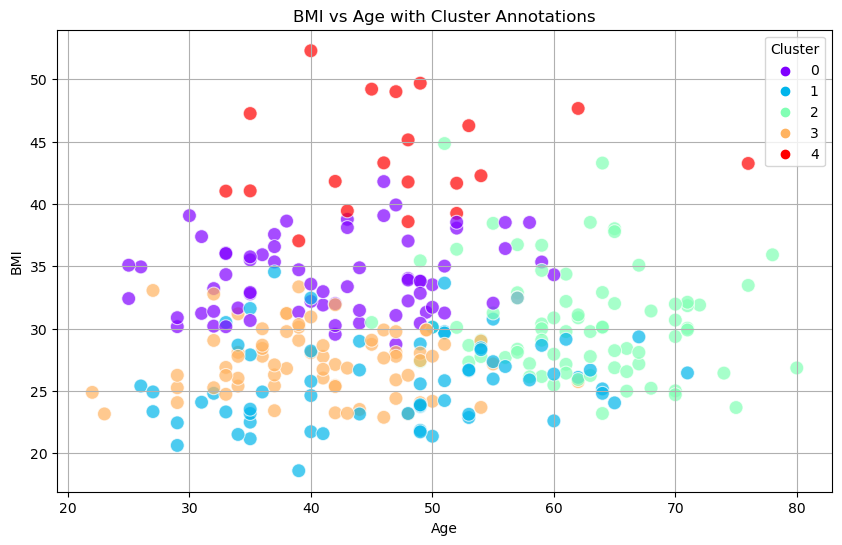

In [ ]:
# Plot BMI vs Age and annotate the scatter points with colors belonging to each cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='BMI', hue='Cluster', palette='rainbow', s=100, alpha=0.7)
plt.title('BMI vs Age with Cluster Annotations')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()



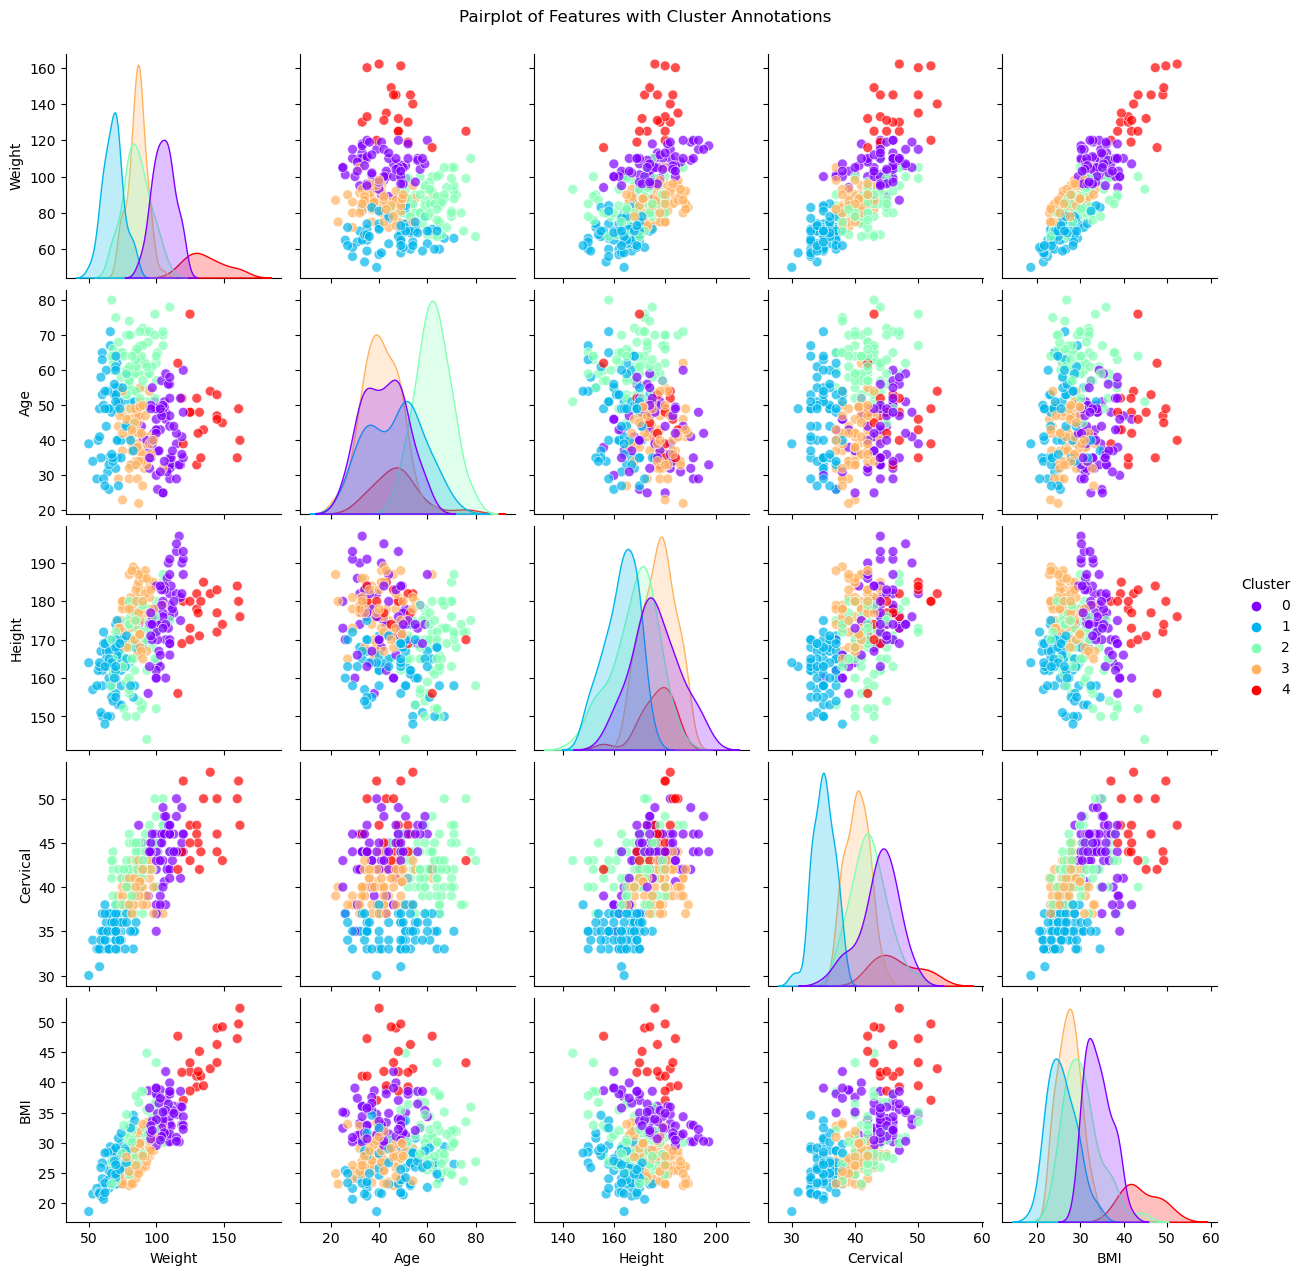

In [26]:
# Plot all features versus each other and annotate the scatter points with colors belonging to each cluster
sns.pairplot(df, vars=features_of_interest, hue='Cluster', palette='rainbow', plot_kws={'alpha':0.7, 's':50})
plt.suptitle('Pairplot of Features with Cluster Annotations', y=1.02)
plt.show()

Cophenet Distance = 0.5142851855735223


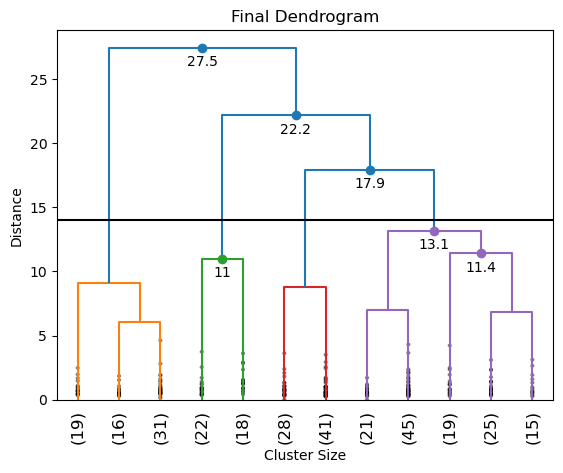

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

# Calculate the distance matrix
distance_matrix = linkage(df_clus_scaled, "ward")

# Calculate the cophenet correlation
c, coph_distance = cophenet(distance_matrix, pdist(df_clus_scaled))
print("Cophenet Distance = " + str(c))

# Function to plot the dendrogram
def dendrogram_tune(*args, **kwargs):
    max_d = kwargs.pop("max_d", None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args, **kwargs)
        
    if not kwargs.get('no_plot', False):
        plt.title("Final Dendrogram")
        plt.xlabel("Cluster Size")
        plt.ylabel("Distance")
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate('%.3g' % y, (x, y), xytext=(0, -5),
                             textcoords="offset points", va="top", ha="center")            
    if max_d:
        plt.axhline(y=max_d, c='k')
        
    return ddata

# Plot the dendrogram
dendrogram_tune(distance_matrix, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=12.,
                show_contracted=True, annotate_above=10, max_d=14)
plt.show()

## Hierarchical clustering

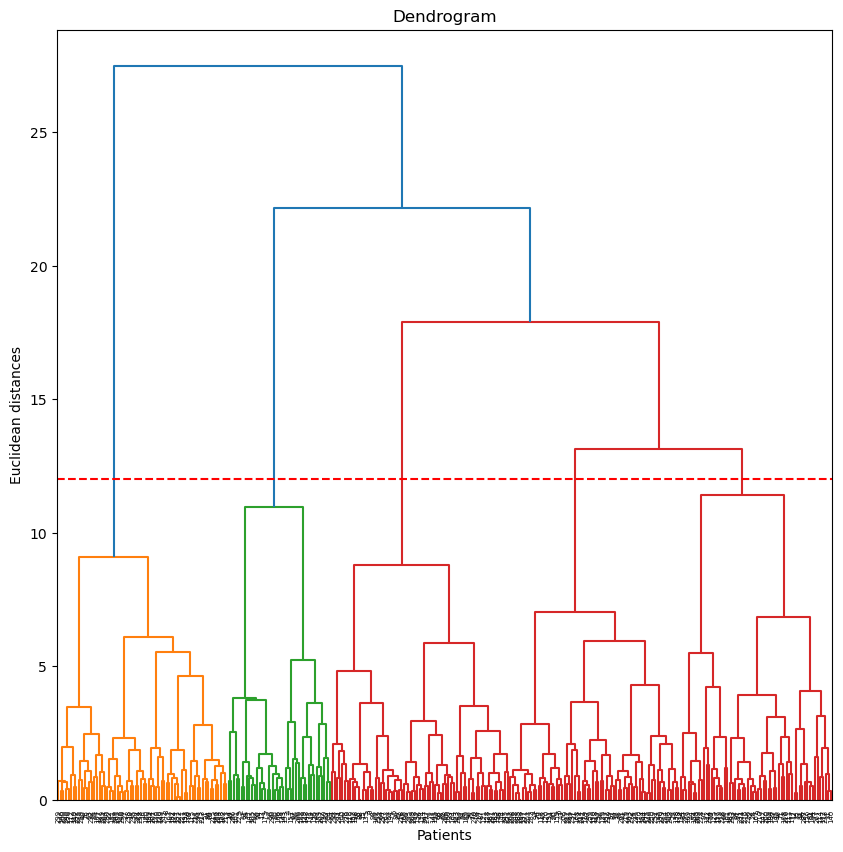

In [34]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 10))
dendrogram = sch.dendrogram(sch.linkage(df_clus_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Patients')
plt.ylabel('Euclidean distances')
plt.axhline(y=12, color='r', linestyle='--')
plt.show()

In [35]:
from sklearn.cluster import AgglomerativeClustering

# Perform agglomerative clustering with 5 clusters
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_clus_scaled)

# Add the cluster labels to the original dataframe
df['Agglomerative_Cluster'] = y_hc

# Display the first few rows of the dataframe with agglomerative cluster labels
df.head()

c:\Users\pc\anaconda3\envs\ENV_MLLB\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,Gender,Weight,Age,Height,Cervical,BMI,OSA,Cluster,Agglomerative_Cluster
0,1,82.000000,39.0,168.000000,40.617735,29.053288,Severe,3,3
1,1,87.797037,46.0,171.399408,43.000000,29.885548,Severe,3,4
2,1,109.000000,32.0,190.000000,42.000000,30.193906,Healthy,0,2
3,1,86.000000,39.0,169.000000,42.000000,30.110991,Severe,3,3
4,1,145.000000,47.0,172.000000,44.000000,49.012980,Severe,4,2


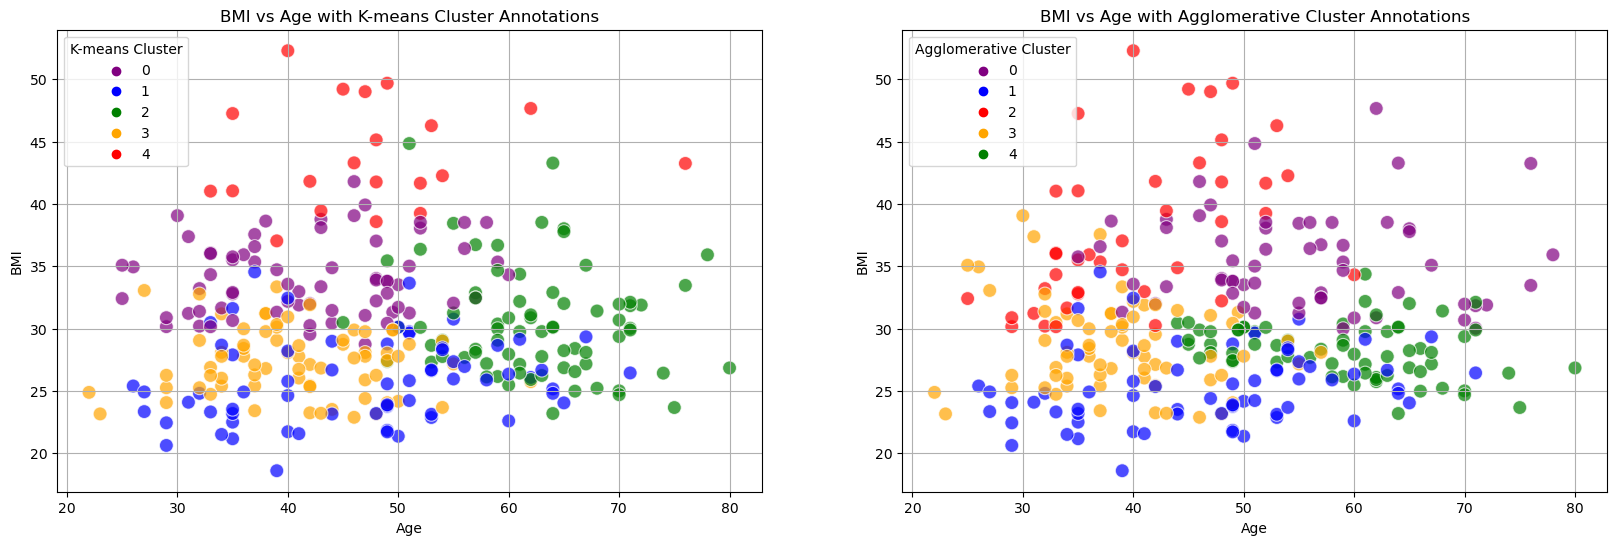

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot for K-means clustering
sns.scatterplot(data=df, x='Age', y='BMI', hue='Cluster', palette={0: 'purple', 1: 'blue', 2: 'green', 3: 'orange', 4: 'red'}, s=100, alpha=0.7, ax=axes[0])
axes[0].set_title('BMI vs Age with K-means Cluster Annotations')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('BMI')
axes[0].legend(title='K-means Cluster')
axes[0].grid(True)

# Plot for Agglomerative clustering
sns.scatterplot(data=df, x='Age', y='BMI', hue='Agglomerative_Cluster', palette={0: 'purple', 1: 'blue', 2: 'red', 3: 'orange', 4: 'green'}, s=100, alpha=0.7, ax=axes[1])
axes[1].set_title('BMI vs Age with Agglomerative Cluster Annotations')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('BMI')
axes[1].legend(title='Agglomerative Cluster')
axes[1].grid(True)

plt.show()